# Example of Tide Prediction For One Date Instance

- Method used to predict tides in this example is adapated from Pytides, a python package developed by Sam Cox. 
- Harmonic Constituents data is scraped from NOAA. 

In [12]:
from noaa_scraper import scrapeURL 
from datetime import datetime
from tide import Tide
import constituent as cons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### **** Modify Station Information Below****

Locate NOAA station ID. NOAA gauge stations home: https://tidesandcurrents.noaa.gov/ <br>
Fill in station ID and date for tide prediction

In [13]:
#Station Information
stationID = '8518750'

#Date of prediction (YEAR, MTH, DAY, HR, MIN)
date = datetime(2017,10,5,0,0)

#NOAA Data Scraping Implementation
scrapeURL(stationID) 

### Tide Prediction

Prediction of tide at specified location (station ID) and specified time (GMT) implemented below. 

In [14]:
#These are the NOAA constituents, in the order presented on NOAA station home page.
constituents = [c for c in cons.noaa if c != cons._Z0]

#Phases and amplitudes retrieved(relative to GMT and in degrees and metres)
noaa_values = np.genfromtxt('{}_constituents.csv'.format(stationID), delimiter=',', dtype = ('<f8', '<f8'), names = True, usecols = (2,3))
noaa_amplitudes = [amplitude for (amplitude, phases) in noaa_values]
noaa_phases = [(np.pi/180.0)*phases for (amplitude, phases) in noaa_values]

#Builds the model.
assert(len(constituents) == len(noaa_phases) == len(noaa_amplitudes))
model = np.zeros(len(constituents), dtype = Tide.dtype)
model['constituent'] = constituents
model['amplitude'] = noaa_amplitudes
model['phase'] = noaa_phases
tide = Tide(model = model, radians = True)

#Predicts tide at a specific instance
height = tide.at([date])
print(height)

[0.85475895]


*******************************************************************************************************************

# Example of Tide Prediction In A Date Interval 

### **** Modify Station Information ****

Fill in station ID, a beginning date and an end date for tide prediction below

In [15]:
#Station Information
stationID = '8518750'

#Beginning and End Dates 
date1 = datetime(2017,10,1,0,0)
date2 = datetime(2017,10,5,0,0)

#NOAA Data Scraping Implementation
scrapeURL(stationID)

In [16]:
#These are the NOAA constituents, in the order presented on their website.
constituents = [c for c in cons.noaa if c != cons._Z0]

#Phases and amplitudes (relative to GMT and in degrees and metres)
noaa_values = np.genfromtxt('{}_constituents.csv'.format(stationID), delimiter=',', dtype = ('<f8', '<f8'), names = True, usecols = (2,3))
noaa_amplitudes = [amplitude for (amplitude, phases) in noaa_values]
noaa_phases = [(np.pi/180.0)*phases for (amplitude, phases) in noaa_values]

#Build the model.
assert(len(constituents) == len(noaa_phases) == len(noaa_amplitudes))
model = np.zeros(len(constituents), dtype = Tide.dtype)
model['constituent'] = constituents
model['amplitude'] = noaa_amplitudes
model['phase'] = noaa_phases
tide = Tide(model = model, radians = True)


### Time Interval Calculations... 
Modify as needed. In this case, I formed an array of dates within the interval of dates provided.

NOTE: I modified the time array by adding + 1 to the period. I wanted 6 minute intervals so I had to add the endpoint.

In [17]:
#Time Calculations 
delta = date2 - date1
t = delta.days*24 + delta.seconds / 3600
mydates = pd.date_range(date1, date2, periods = (len(np.arange(0,t,.1)) + 1)).tolist()

### Tide Predictions
Plot results in a time series plot

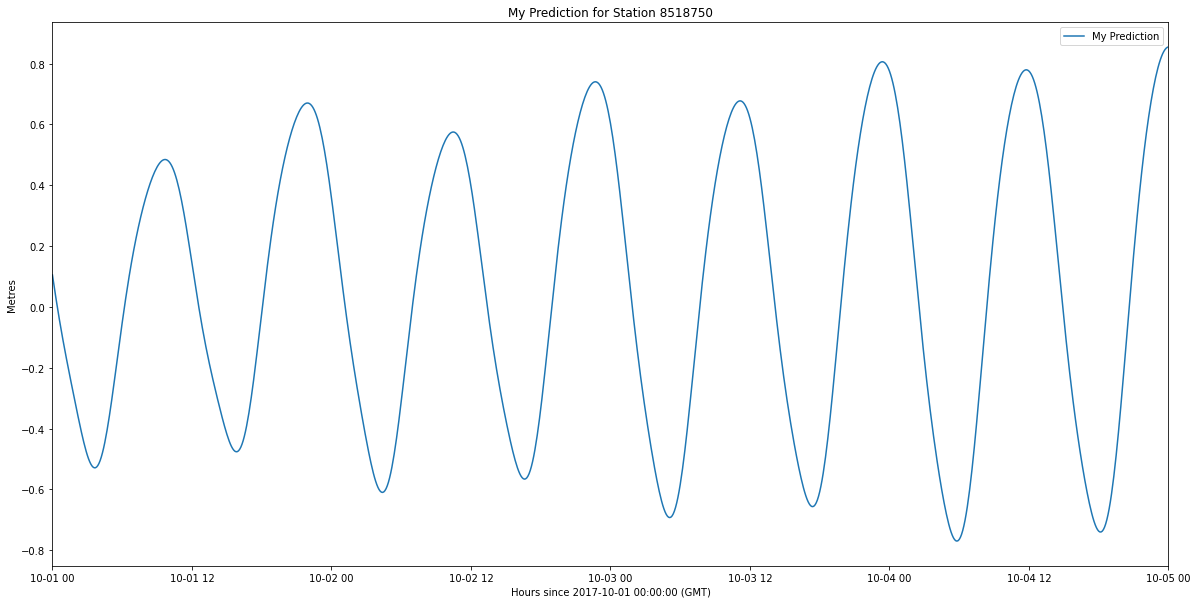

In [18]:
#Height Calculations
heights_arrays = []
{heights_arrays.append(tide.at([mydates[i]])) for i in range(len(mydates))}
heights_list = [val for sublist in heights_arrays for val in sublist] 

#Plot Comparisons
plt.figure(figsize=(20,10))
plt.plot(mydates, heights_list, "-", label="My Prediction")
plt.xlabel('Hours since ' + str(date1) + ' (GMT)')
plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
plt.title('My Prediction for Station {}'.format(stationID))
plt.show()

*******************************************************************************************************************

# Example of NOAA and Our Tide Prediction Comparisons In A Date Interval 

In [19]:
#Station Information
stationID = '8518750'

#Dates
date1 = datetime(2017,10,1,0,0)
date2 = datetime(2017,10,5,0,0)

#NOAA Data Scraping Implementation
scrapeURL(stationID)

In [20]:
#These are the NOAA constituents, in the order presented on their website.
constituents = [c for c in cons.noaa if c != cons._Z0]

#Phases and amplitudes (relative to GMT and in degrees and metres)
noaa_values = np.genfromtxt('{}_constituents.csv'.format(stationID), delimiter=',',\
                            dtype = ('<f8', '<f8'), names = True, usecols = (2,3))
noaa_amplitudes = [amplitude for (amplitude, phases) in noaa_values]
noaa_phases = [(np.pi/180.0)*phases for (amplitude, phases) in noaa_values]

#Build the model.
assert(len(constituents) == len(noaa_phases) == len(noaa_amplitudes))
model = np.zeros(len(constituents), dtype = Tide.dtype)
model['constituent'] = constituents
model['amplitude'] = noaa_amplitudes
model['phase'] = noaa_phases
tide = Tide(model = model, radians = True)

#Time Calculations 
delta = date2 - date1
t = delta.days*24 + delta.seconds / 3600
mydates = pd.date_range(date1, date2, periods = (len(np.arange(0,t,.1)) + 1)).tolist()

#Height Calculations
heights_arrays = []
{heights_arrays.append(tide.at([mydates[i]])) for i in range(len(mydates))}
heights_list = [val for sublist in heights_arrays for val in sublist] 

- Download NOAA observed and predicted tide for date interval you are working with from NOAA website
- For this example, I made a directory called Examples within this directory for the example files I downloaded
- Modify the code as neccessary to read in data from downloaded file

In [32]:
#Reads in NOAA Data
prediction = np.genfromtxt('Example_Data/CO-OPS_{}_met.csv'.format(stationID),\
                           delimiter=',', skip_header=1, usecols = (2,4), dtype = 'str')
updated_prediction = np.asanyarray(np.char.strip(prediction, '"').astype(float))
predicted_heights, observed_heights = [], []
{predicted_heights.append(predicted_height) for predicted_height in updated_prediction[:,0]} #NOAA Predicted Heights
{observed_heights.append(observed_height) for observed_height in updated_prediction[:,1]}   #NOAA Observed Heights

{None}

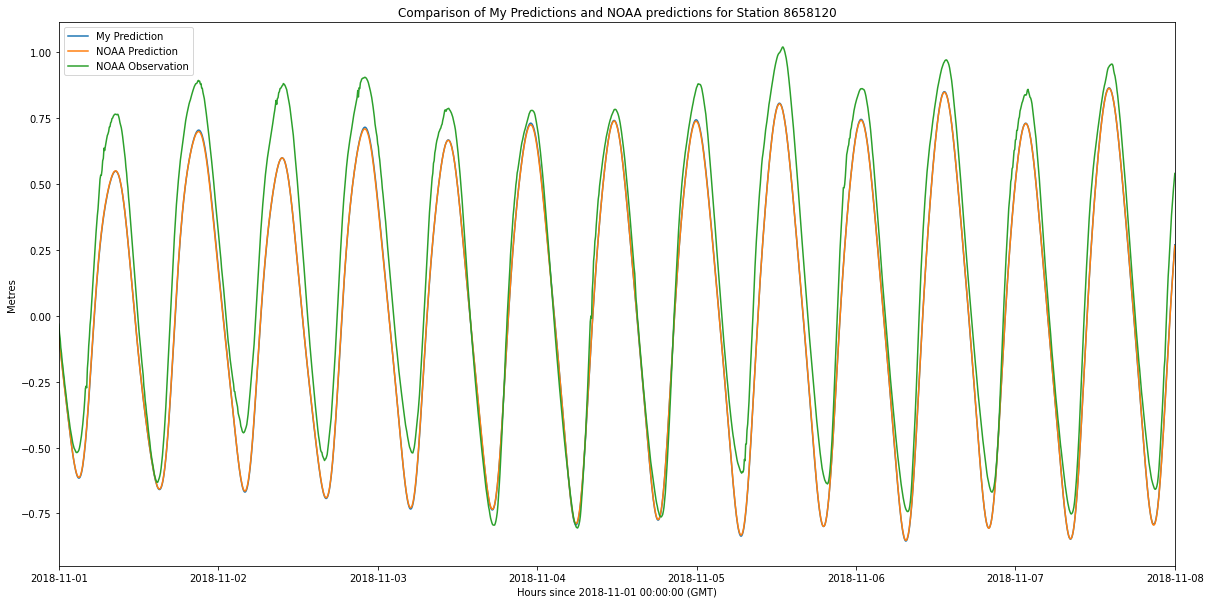

In [33]:
#Plot Comparisons
plt.figure(figsize=(20,10))
plt.plot(mydates, heights_list, "-", label="My Prediction")
plt.plot(mydates, predicted_heights[:len(mydates)], "-", label="NOAA Prediction")
plt.plot(mydates, observed_heights[:len(mydates)], "-", label="NOAA Observation")
plt.xlabel('Hours since ' + str(date1) + ' (GMT)')
plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
plt.title('Comparison of My Predictions and NOAA predictions for Station {}'.format(stationID))
plt.show()

In [34]:
#NOAA vs Our Prediction Differences
difference_1, difference_2  = [], []
zip_object = zip(observed_heights[:len(mydates)], heights_list)    
{difference_1.append(list1_i-list2_i) for list1_i, list2_i in zip_object}
zip_object = zip(observed_heights[:len(mydates)], predicted_heights[:len(mydates)])
{difference_2.append(list1_i-list2_i) for list1_i, list2_i in zip_object}


{None}

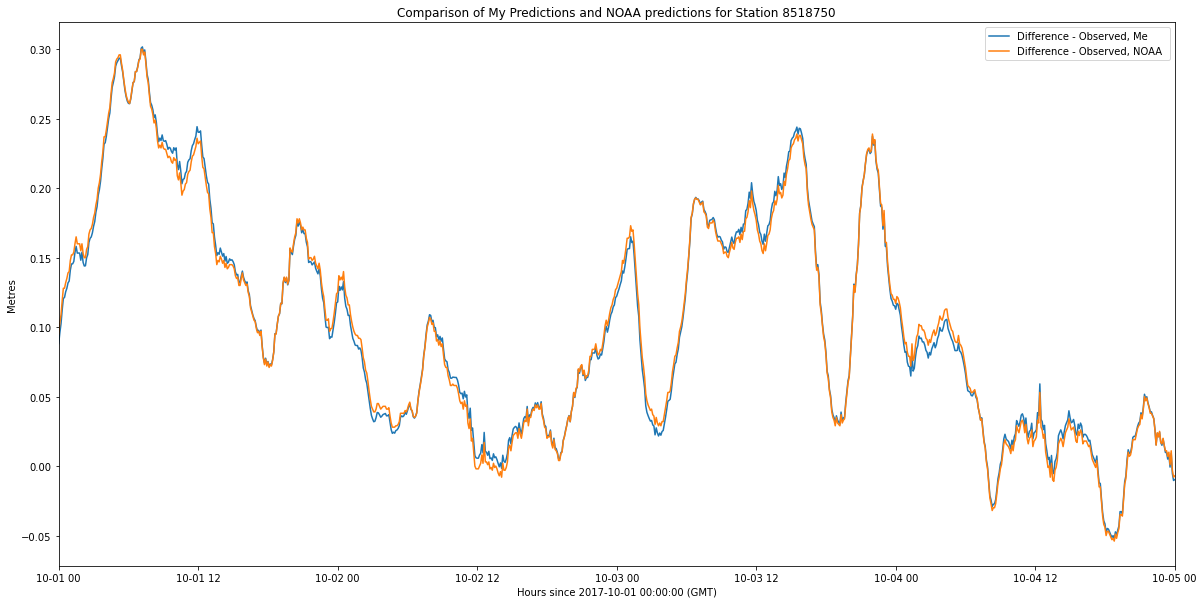

In [24]:
#Plot Difference Comparisons
plt.figure(figsize=(20,10))
plt.plot(mydates, difference_1, "-", label="Difference - Observed, Me")
plt.plot(mydates, difference_2, "-", label="Difference - Observed, NOAA ")
plt.xlabel('Hours since ' + str(date1) + ' (GMT)')
plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
plt.title('Comparison of My Predictions and NOAA predictions for Station {}'.format(stationID))
plt.show()

*******************************************************************************************************************

# Example Iterating Through A Library Of Stations And Date Intervals

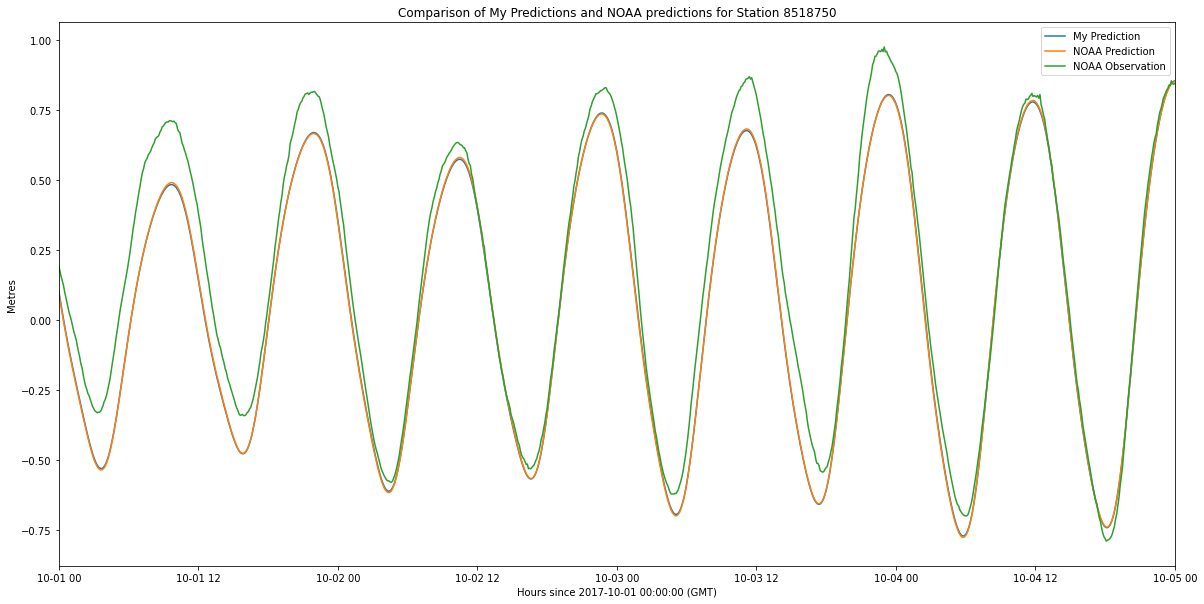

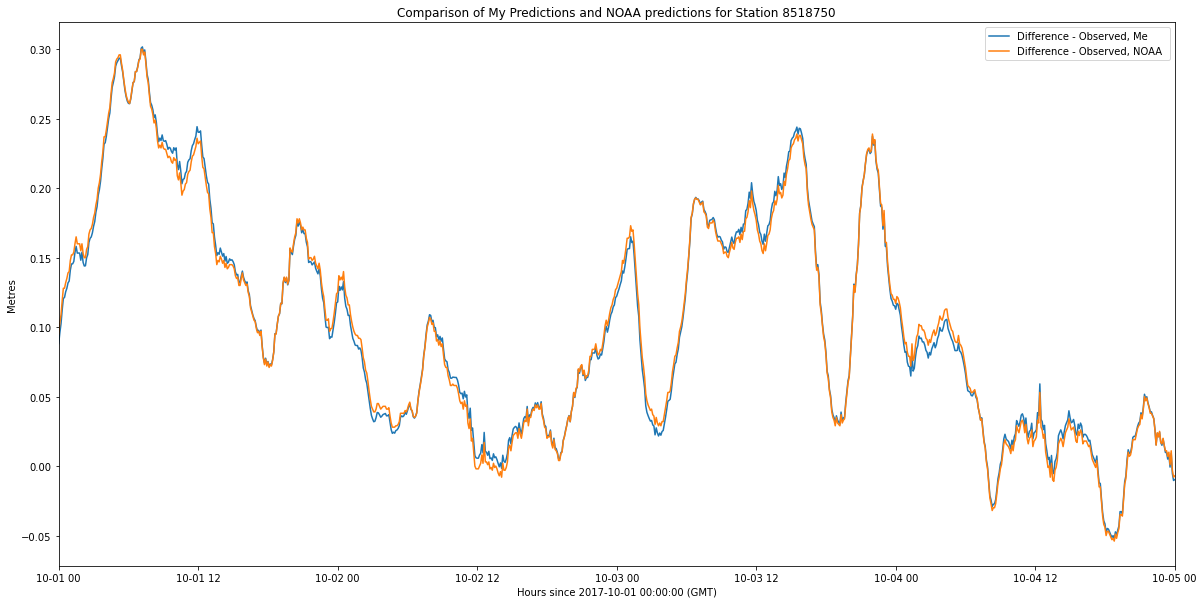

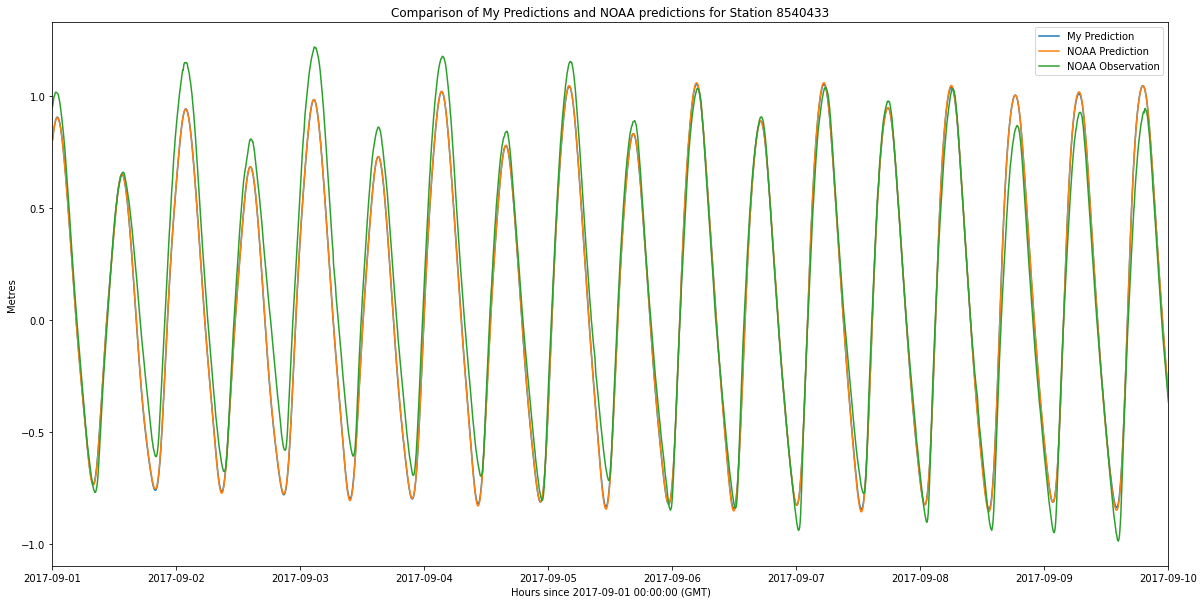

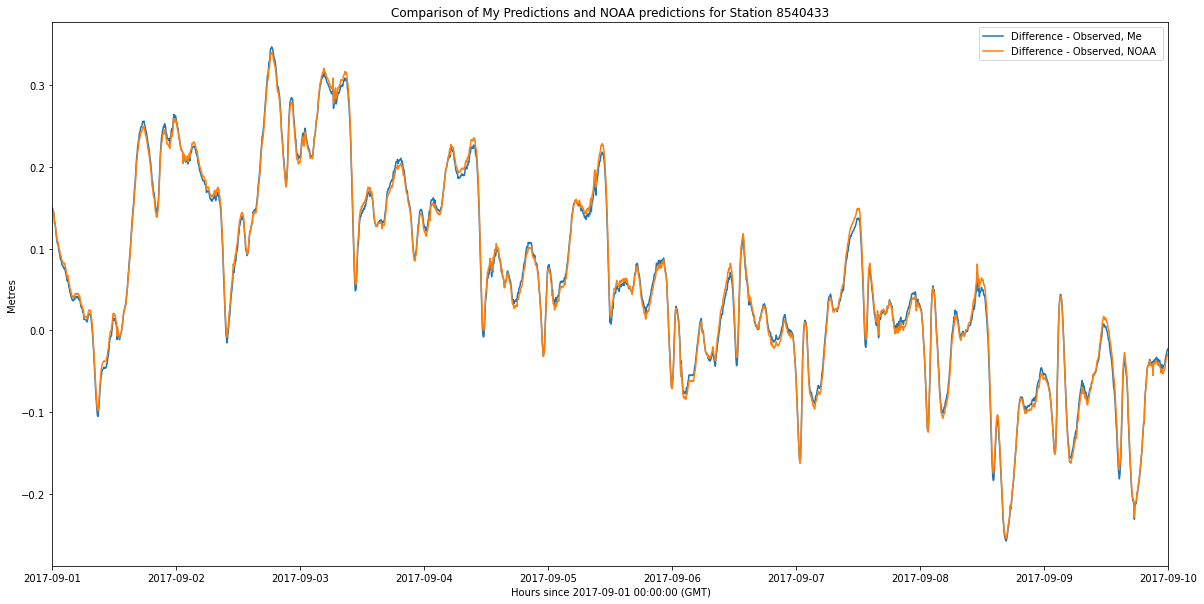

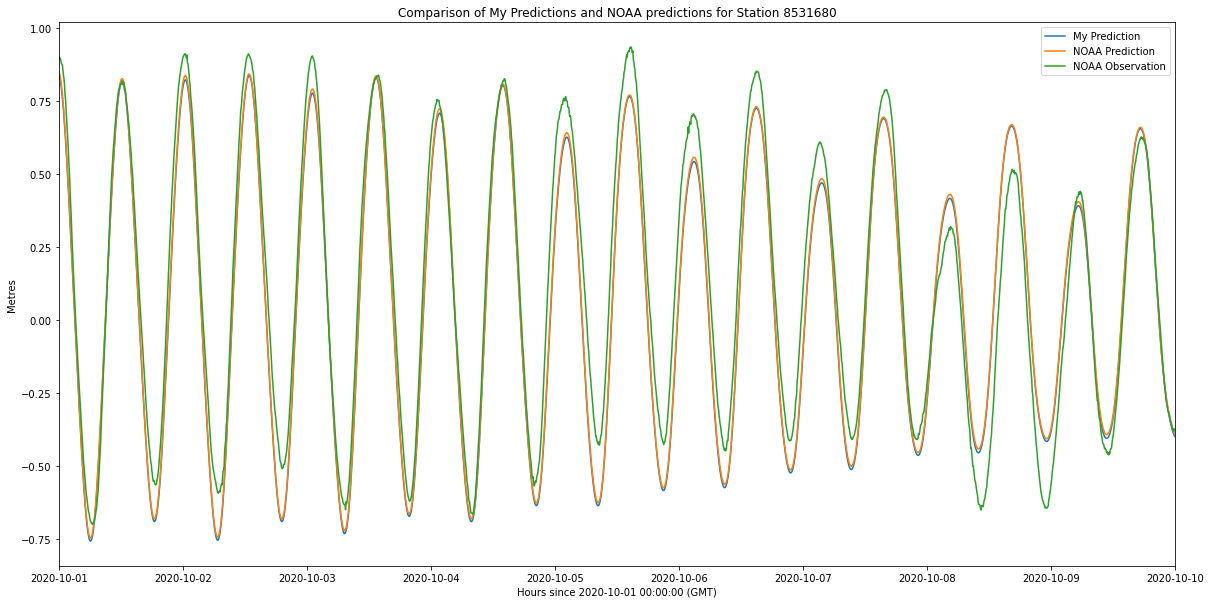

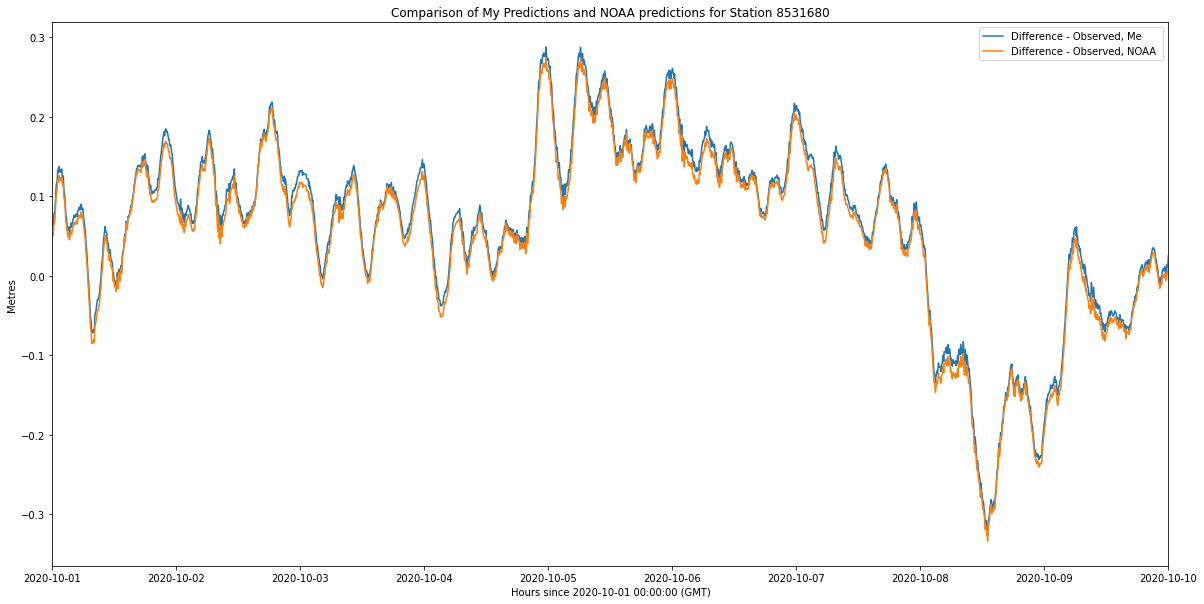

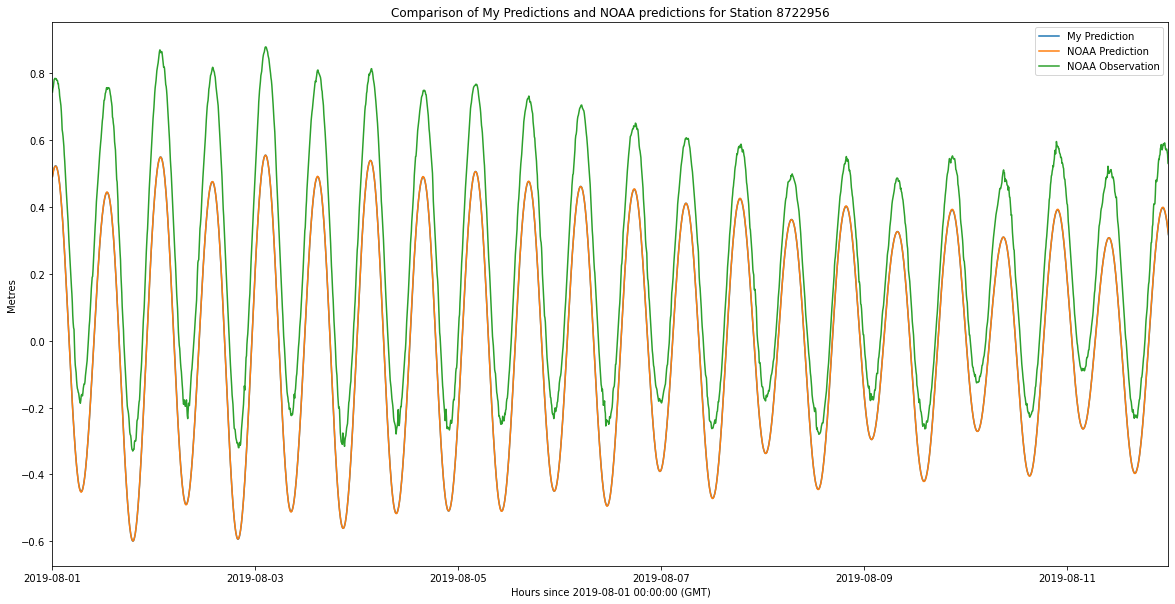

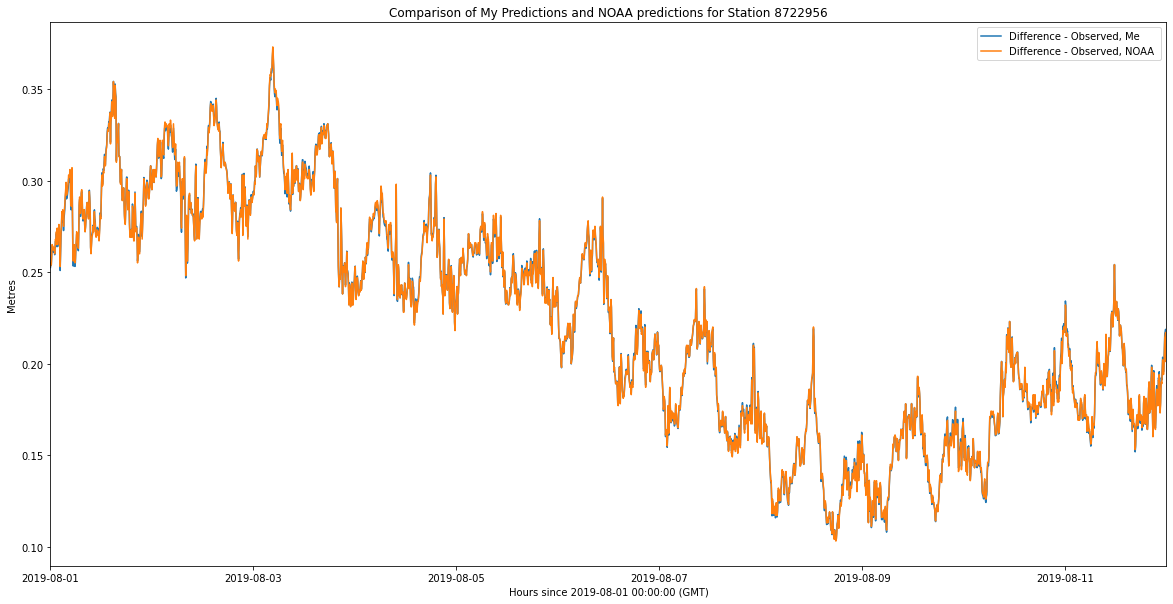

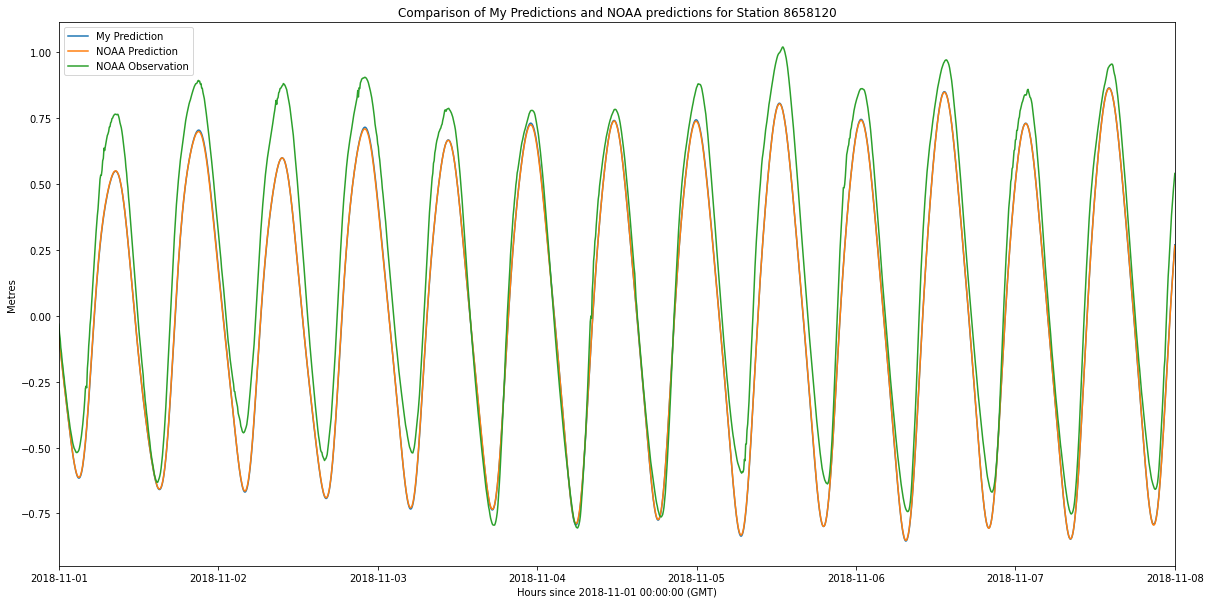

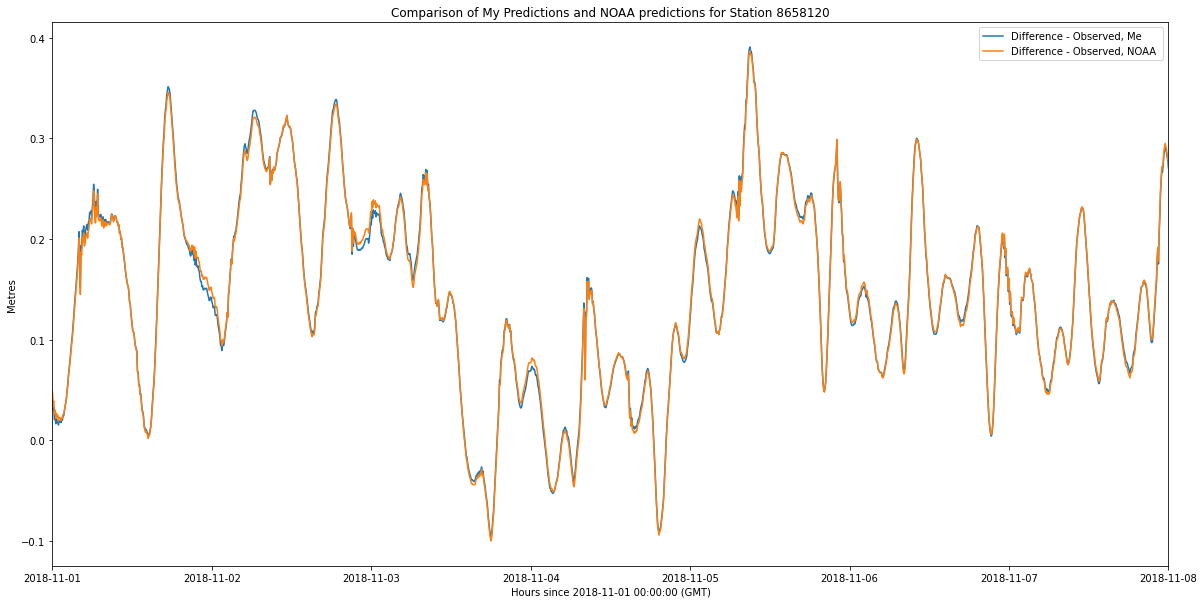

In [31]:
from noaa_scraper import scrapeURL 
from datetime import datetime
from tide import Tide
import constituent as cons
import matplotlib.pyplot as plt
import numpy as np
import os


station_dict = {'8518750':(datetime(2017,10,1,0,0), datetime(2017,10,5,0,0)),
                '8540433':(datetime(2017,9,1,0,0), datetime(2017,9,10,0,0)),
                '8531680':(datetime(2020,10,1,0,0), datetime(2020,10,10,0,0)),
                '8722956':(datetime(2019,8,1,0,0), datetime(2019,8,12,0,0)),
                '8658120':(datetime(2018,11,1,0,0), datetime(2018,11,8,0,0))}

for (key, value) in station_dict.items():
    stationID = key
    date1 = value[0]
    date2 = value[1]

    #NOAA Data Scraping Implementation
    scrapeURL(stationID)
    
    #These are the NOAA constituents, in the order presented on their website.
    constituents = [c for c in cons.noaa if c != cons._Z0]
    
    #Phases and amplitudes (relative to GMT and in degrees and metres)
    noaa_values = np.genfromtxt('{}_constituents.csv'.format(stationID), delimiter=',',\
                                dtype = ('<f8', '<f8'), names = True, usecols = (2,3))
    noaa_amplitudes = [amplitude for (amplitude, phases) in noaa_values]
    noaa_phases = [(np.pi/180.0)*phases for (amplitude, phases) in noaa_values]
    
    #Build the model.
    assert(len(constituents) == len(noaa_phases) == len(noaa_amplitudes))
    model = np.zeros(len(constituents), dtype = Tide.dtype)
    model['constituent'] = constituents
    model['amplitude'] = noaa_amplitudes
    model['phase'] = noaa_phases
    tide = Tide(model = model, radians = True)
    
    #Time Calculations 
    delta = date2 - date1
    t = delta.days*24 + delta.seconds / 3600
    mydates = pd.date_range(date1, date2, periods = (len(np.arange(0,t,.1)) + 1)).tolist()
    
    #Height Calculations
    heights_arrays = []
    {heights_arrays.append(tide.at([mydates[i]])) for i in range(len(mydates))}
    heights_list = [val for sublist in heights_arrays for val in sublist] 
    
    #Read in NOAA Data
    prediction = np.genfromtxt('Example_Data/CO-OPS_{}_met.csv'.format(stationID),\
                               delimiter=',', skip_header=1, usecols = (2,4), dtype = 'str')
    updated_prediction = np.asanyarray(np.char.strip(prediction, '"').astype(float))
    predicted_heights, observed_heights = [], []
    {predicted_heights.append(predicted_height) for predicted_height in updated_prediction[:,0]} #NOAA Predicted Heights
    {observed_heights.append(observed_height) for observed_height in updated_prediction[:,1]}   #NOAA Observed Heights
        
    #NOAA vs Our Difference Differences
    difference_1, difference_2  = [], []
    zip_object = zip(observed_heights[:len(mydates)], heights_list)    
    {difference_1.append(list1_i-list2_i) for list1_i, list2_i in zip_object}
    zip_object = zip(observed_heights[:len(mydates)], predicted_heights[:len(mydates)])
    {difference_2.append(list1_i-list2_i) for list1_i, list2_i in zip_object}
    
    #Plot Comparisons
    plt.figure(figsize=(20,10))
    #plt.plot(y=["R", "Dst_count"], figsize=(15,4));
    plt.plot(mydates, heights_list, "-", label="My Prediction")
    plt.plot(mydates, predicted_heights[:len(mydates)], "-", label="NOAA Prediction")
    plt.plot(mydates, observed_heights[:len(mydates)], "-", label="NOAA Observation")
    plt.xlabel('Hours since ' + str(date1) + ' (GMT)')
    plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
    plt.title('Comparison of My Predictions and NOAA predictions for Station {}'.format(stationID))
    plt.show()
    
    #Plot Differences Comparisons
    plt.figure(figsize=(20,10))
    plt.plot(mydates, difference_1, "-", label="Difference - Observed, Me")
    plt.plot(mydates, difference_2, "-", label="Difference - Observed, NOAA ")
    plt.xlabel('Hours since ' + str(date1) + ' (GMT)')
    plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
    plt.title('Comparison of My Predictions and NOAA predictions for Station {}'.format(stationID))
    plt.show()
    